# REGRESIÓN LOGÍSTICA

## IMPORTS

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures


## LEER LOS DATOS

In [2]:
data = read_csv("ex2data1.csv", header=None).to_numpy()
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])

m = X.shape[0]
X = np.hstack([np.ones([m, 1]), X])

n = X.shape[1]
theta = np.zeros(n)

## DIBUJAR LOS DATOS

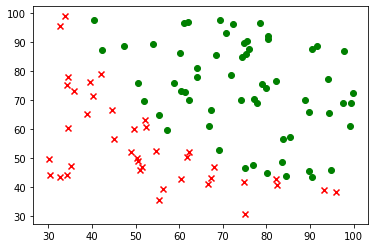

In [3]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)


plt.figure()
plt.scatter(X[pos, 1], X[pos, 2], marker='o', color='g')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', color='r')
plt.show()

## FUNCIÓN SIGMOIDE

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## FUNCIÓN DE COSTE

In [5]:
def coste(theta, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    
    h_theta = np.dot(X, theta)
    sig = sigmoid(h_theta)
    positive = np.dot(np.log(sig).T, Y)
    negative = np.dot(np.log(1 - sig).T, 1 - Y)
    J_theta = (-1 / m) * (positive + negative)
    return J_theta

In [6]:
# PRUEBAS
print(coste(theta, X, Y))

0.6931471805599453


## FUNCIÓN DE GRADIENTE

In [7]:
def gradiente(theta, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    
    h_theta = np.dot(X, theta.T)
    sig = sigmoid(h_theta)
    gradient = (1/m) * np.dot(sig.T - Y, X)
    return gradient

In [8]:
# PRUEBAS
print(gradiente(theta, X, Y))

[ -0.1        -12.00921659 -11.26284221]


## CÁLCULO DEL VALOR ÓPTIMO A TRAVÉS DE FMIN_TNC - SCIPY

In [9]:
theta_optima, _, _ = opt.fmin_tnc(
    func=coste,
    x0 = theta,
    fprime=gradiente,
    args=(X, Y)
)

In [10]:
# Pruebas
coste_optimo = coste(theta_optima, X, Y)
print(coste_optimo)

0.20349770158947508


## DIBUJAR LA FRONTERA DE DECISIÓN

In [11]:
def pinta_frontera(X, Y, theta):

    x1_min, x1_max = np.min(X[:, 1]), np.max(X[:, 1])
    x2_min, x2_max = np.min(X[:, 2]), np.max(X[:, 2])

    # print(x1_min, x1_max)
    # print(x2_min, x2_max)

    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max),
        np.linspace(x2_min, x2_max)
    )

    h = sigmoid(
        np.c_[
            np.ones((xx1.ravel().shape[0], 1)),
            xx1.ravel(),
            xx2.ravel()
        ].dot(theta)
    )

    h = h.reshape(xx1.shape)


    plt.contour(xx1, xx2, h, [.5], linewidths=1, colors='b')

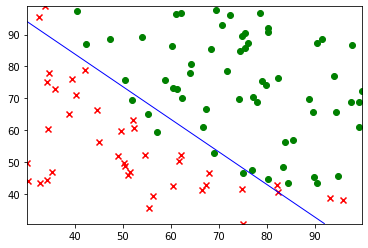

In [12]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)

plt.scatter(X[pos, 1], X[pos, 2], marker='o', color='g')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', color='r')

pinta_frontera(X, Y, theta_optima)

plt.show()


## EVALUACIÓN DE LA REGRESIÓN LOGÍSTICA

In [38]:
def evaluar(X, Y, theta):
    predicciones = np.dot(X, theta_optima) >= 0.5
    aciertos = np.sum(predicciones == Y)
    porcentaje = aciertos / X.shape[0] * 100
    
    print("La regresión logística es fiable en un {:.2f}% de ocasiones\n".format(porcentaje))
    
# evaluar(X, Y, theta_optima)


# REGULARIZACIÓN

## LEER DATOS

In [14]:
data = read_csv("ex2data2.csv", header=None).to_numpy()
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])

## DIBUJAR LOS DATOS

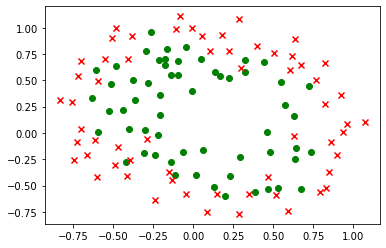

In [15]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)

plt.figure()
plt.scatter(X[pos, 0], X[pos, 1], marker='o', color='g')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', color='r')
plt.show()

## X = POLINOMIO GRADO 6

In [16]:
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

## INICIALIZAR VALORES

In [17]:
m = X_poly.shape[0]
n = X_poly.shape[1]

theta = np.zeros(n)

## FUNCIÓN DE COSTE REGULARIZADO

In [18]:
def coste_regularizado(theta, X, Y, lam):
    m = X_poly.shape[0]
    reg = (lam /(2 * m)) * np.sum(np.square(theta))
    return coste(theta, X, Y) + reg

In [19]:
# PRUEBAS
print(coste_regularizado(theta, X_poly, Y, 1))

0.6931471805599454


## FUNCIÓN DE GRADIENTE REGULARIZADA

In [20]:
def gradiente_regularizada(theta, X, Y, lam):
    m = X_poly.shape[0]
    reg = (lam / m) * theta
    return gradiente(theta, X, Y) + reg

In [21]:
# PRUEBAS
print(gradiente_regularizada(theta, X_poly, Y, 1))

[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


## CÁLCULO DEL VALOR ÓPTIMO A TRAVÉS DE FMIN_TNC - SCIPY

In [22]:
theta_optima, _, _ = opt.fmin_tnc(
    func=coste_regularizado,
    x0 = theta,
    fprime=gradiente_regularizada,
    args=(X_poly, Y, 1)
)

In [23]:
# PRUEBAS
coste_optimo = coste_regularizado(theta_optima, X_poly, Y, 1)
print(coste_optimo)

0.5351602547833242


## DIBUJAR LA FRONTERA DE DECISIÓN


In [24]:
def pinta_frontera_polinomica(X, Y, theta, poly): 

    x1_min, x1_max = np.min(X[:, 0]), np.max(X[:, 0])
    x2_min, x2_max = np.min(X[:, 1]), np.max(X[:, 1])
    
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max), 
        np.linspace(x2_min, x2_max)
    ) 
    
    h = sigmoid(
        poly.fit_transform(
            np.c_[
                xx1.ravel(), 
                  xx2.ravel()
            ]
        ).dot(theta)
    ) 
    
    h = h.reshape(xx1.shape) 
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

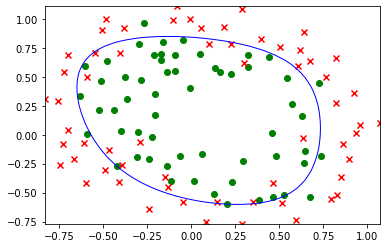

In [25]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)

plt.figure()
plt.scatter(X[pos, 0], X[pos, 1], marker='o', color='g')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', color='r')
pinta_frontera_polinomica(X, Y, theta_optima, poly)
plt.show()

## EXPERIMENTAR CON DIFERENTES THETAS

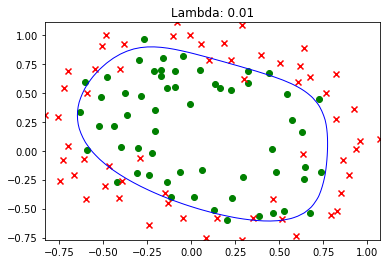

La regresión logística es fiable en un 83.90% de ocasiones





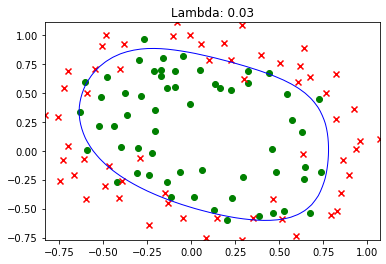

La regresión logística es fiable en un 84.75% de ocasiones





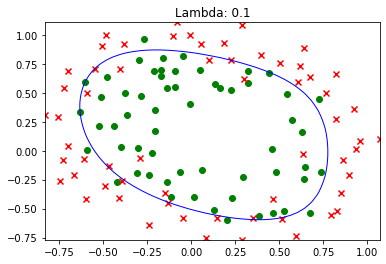

La regresión logística es fiable en un 82.20% de ocasiones





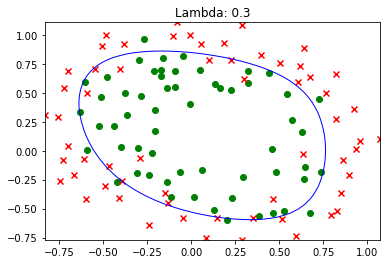

La regresión logística es fiable en un 81.36% de ocasiones





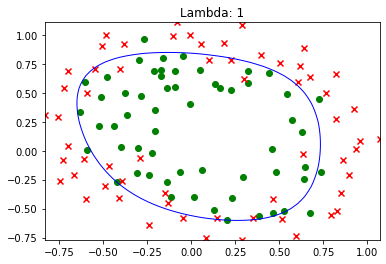

La regresión logística es fiable en un 76.27% de ocasiones





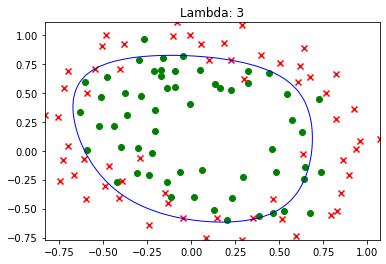

La regresión logística es fiable en un 59.32% de ocasiones





In [41]:
lambdas = [.01, .03, .1, .3, 1, 3]

for l in lambdas:
    theta_optima, _, _ = opt.fmin_tnc(
        func=coste_regularizado,
        x0 = theta,
        fprime=gradiente_regularizada,
        args=(X_poly, Y, l)
    )
    
    pos = np.where(Y == 1)
    neg = np.where(Y == 0)

    plt.figure()
    plt.title('Lambda: {}'.format(l))
    plt.scatter(X[pos, 0], X[pos, 1], marker='o', color='g')
    plt.scatter(X[neg, 0], X[neg, 1], marker='x', color='r')
    pinta_frontera_polinomica(X, Y, theta_optima, poly)
    
    plt.show()
    
    evaluar(X_poly, Y, theta_optima)
    print("\n")